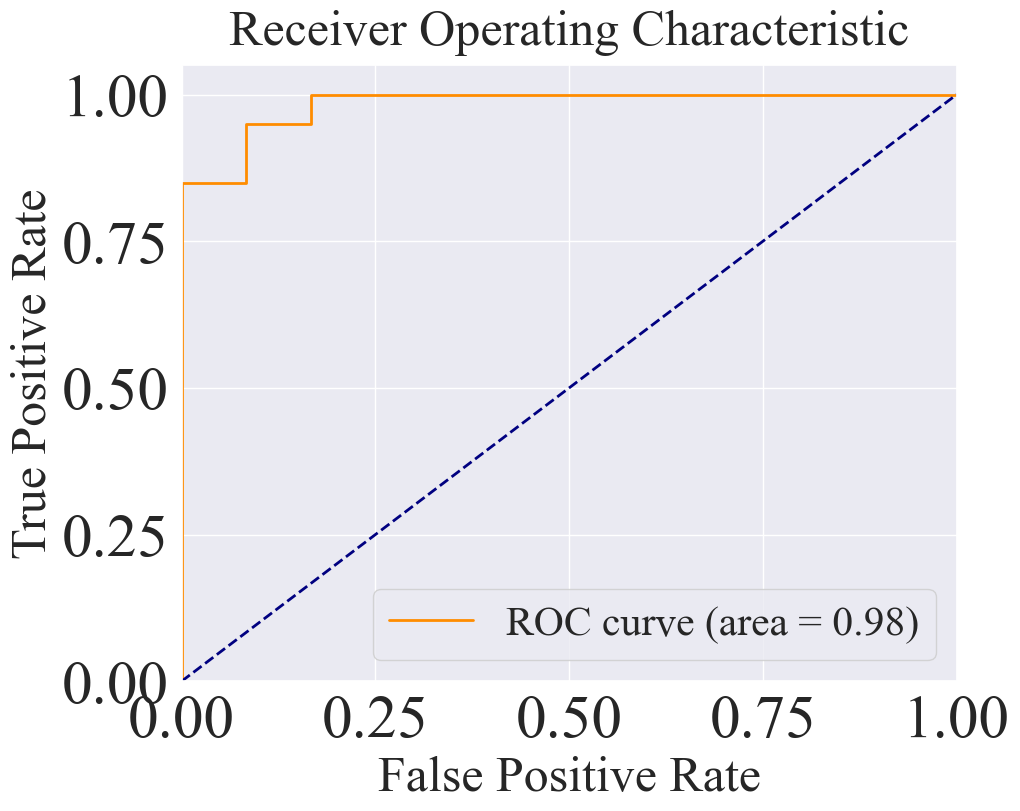

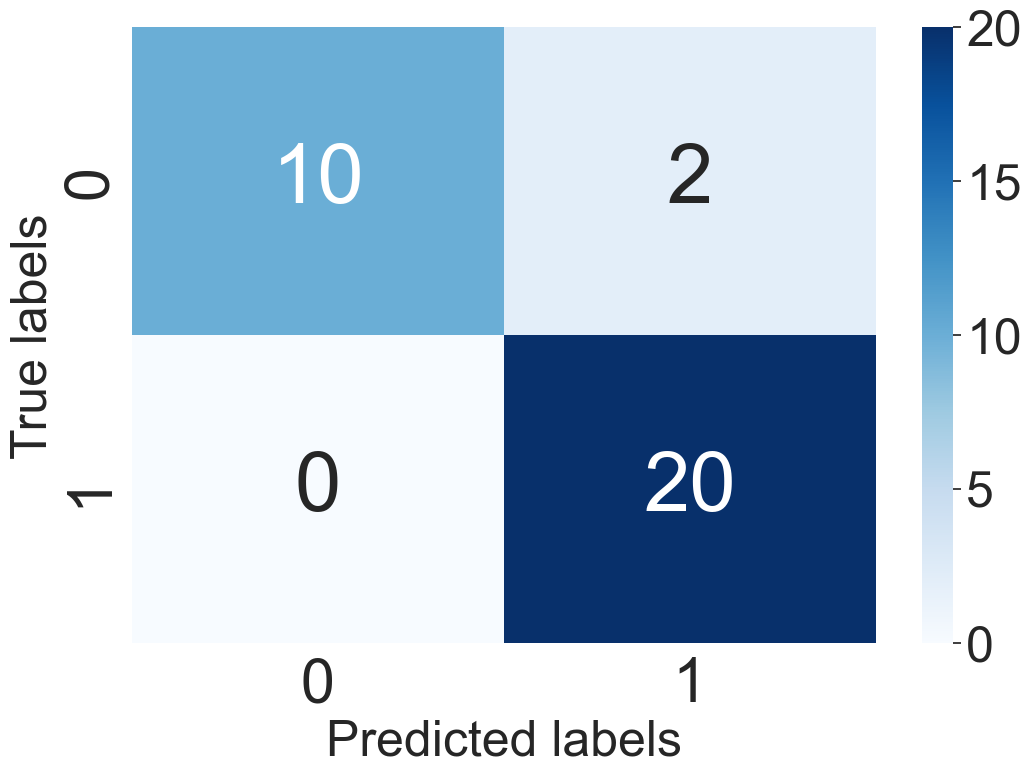

AUC Score: 0.9833333333333334
Sensitivity: 1.0
Accuracy: 0.9375
Confusion Matrix:
[[10  2]
 [ 0 20]]
Specificity: 0.8333333333333334
Precision: 0.9090909090909091


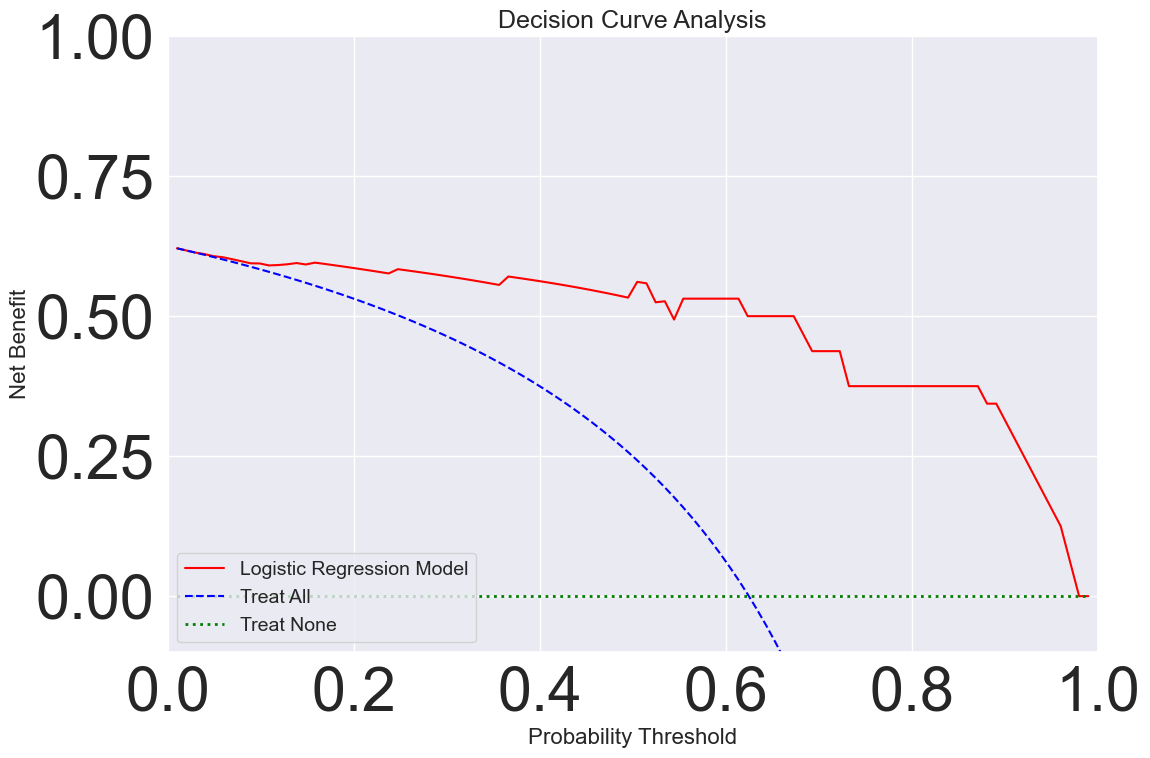

In [10]:
#随机森林
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_train.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_test.csv')
# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 3. 初始化并训练随机森林模型
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('LASSO feature-Random forest', fontsize=36, y=1.02)  # 调整标题位置
plt.show()
# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)


# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Specificity:", specificity)
print("Precision:", precision)

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate net benefit for the model
def calculate_net_benefit(thresholds, y_true, y_proba):
    net_benefits = []
    for threshold in thresholds:
        w = threshold / (1 - threshold)  # Weight for false positives
        predictions = y_proba >= threshold  # Predictions based on the current threshold
        tp = np.sum((predictions == 1) & (y_true == 1))  # True positives
        fp = np.sum((predictions == 1) & (y_true == 0))  # False positives
        net_benefit = tp - (fp * w)  # Calculate net benefit
        net_benefits.append(net_benefit / len(y_true))
    return net_benefits

# Calculate net benefit for "All" treated (assumes all cases are positive)
def net_benefit_all(thresholds, y_true):
    prevalence = np.mean(y_true)
    return [prevalence - (1 - prevalence) * (threshold / (1 - threshold)) for threshold in thresholds]

# Calculate net benefit for "None" treated (assumes no cases are positive)
def net_benefit_none(thresholds):
    return [0 for _ in thresholds]

# Range of thresholds from 0.01 to 0.99
thresholds = np.linspace(0.01, 0.99, 100)

# Calculate net benefits
model_net_benefits = calculate_net_benefit(thresholds, y_test, y_pred_proba)
all_net_benefits = net_benefit_all(thresholds, y_test)
none_net_benefits = net_benefit_none(thresholds)

# Plot Decision Curve Analysis
plt.figure(figsize=(12, 8))
plt.plot(thresholds, model_net_benefits, label='Logistic Regression Model', color='red')
plt.plot(thresholds, all_net_benefits, label='Treat All', color='blue', linestyle='--')
plt.plot(thresholds, none_net_benefits, label='Treat None', color='green', linestyle=':', linewidth=2)
plt.xlabel('Probability Threshold', fontsize=16)
plt.ylabel('Net Benefit', fontsize=16)
plt.title('Decision Curve Analysis', fontsize=18)
plt.legend(loc='lower left', fontsize=14)
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([-0.1, 1])  # Adjust Y-axis to slightly below zero for visibility
plt.show()


C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


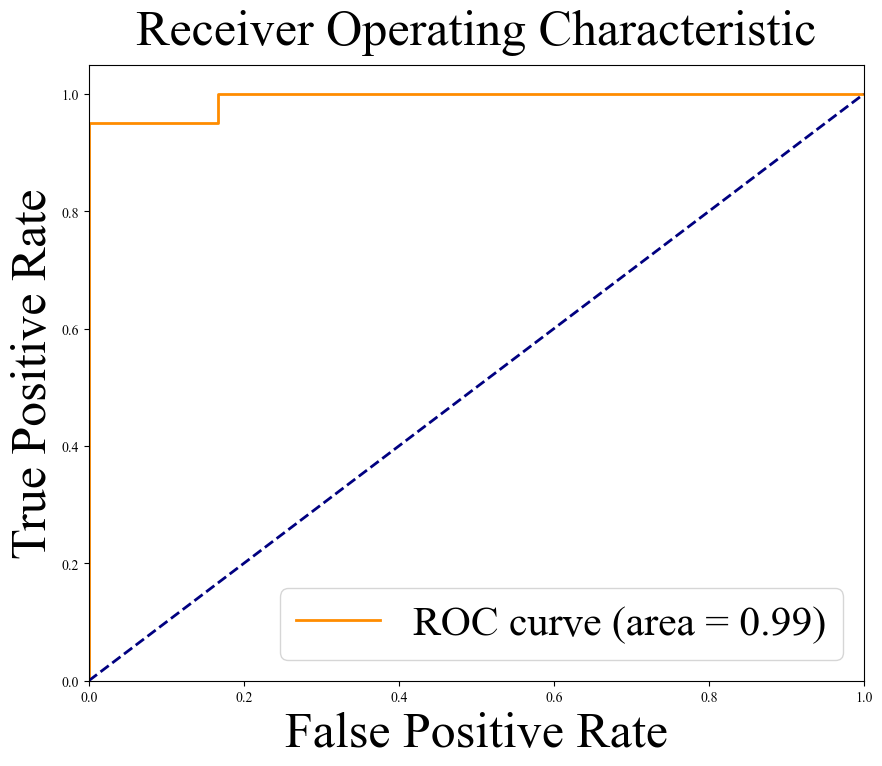

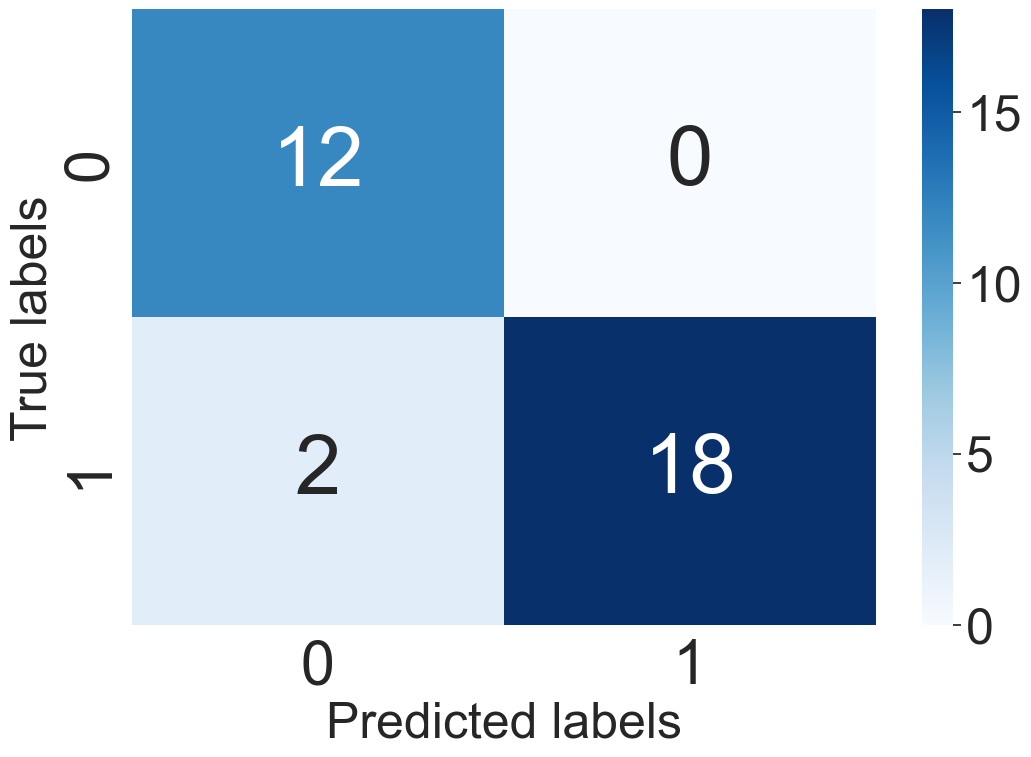

AUC Score: 0.9916666666666667
Sensitivity: 0.9
Accuracy: 0.9375
Confusion Matrix:
[[12  0]
 [ 2 18]]
Specificity: 1.0
Precision: 1.0


C:\Users\xiao\AppData\Local\Temp\ipykernel_16364\1309513370.py:88: RuntimeWarning: divide by zero encountered in scalar divide
  return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))
C:\Users\xiao\AppData\Local\Temp\ipykernel_16364\1309513370.py:88: RuntimeWarning: invalid value encountered in scalar multiply
  return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))


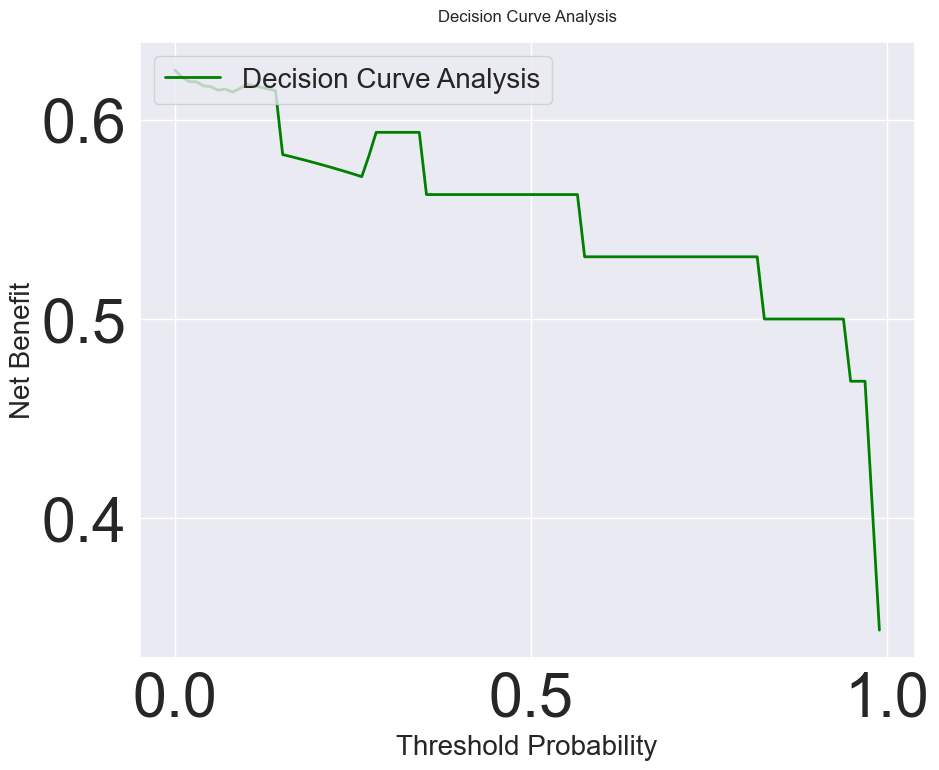

In [1]:
#xgboost
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_train.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_test.csv')
# 2. 分离特征和标签
x_train = train_data.drop('label', axis=1)
y_train = train_data['label']
x_test = test_data.drop('label', axis=1)
y_test = test_data['label']
clf_XGB = XGBClassifier(use_label_encoder=False)
clf_XGB.fit(x_train, y_train)
# 计算预测概率
y_pred_proba = clf_XGB.predict_proba(x_test)[:, 1]

# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# 计算模型评估指标
y_pred = clf_XGB.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('LASSO feature-Xgboost', fontsize=36, y=1.02)  # 调整标题位置
plt.show()
# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 输出模型评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
# print("AUC Score:", auc_score)
print("Confusion Matrix:")
print(conf_matrix)
print("Specificity:", specificity)
print("Precision:", precision)

import numpy as np

def calculate_net_benefit(tp, fp, threshold, num_cases):
    """
    Calculate the net benefit for a given threshold.

    Args:
    tp (int): True positives.
    fp (int): False positives.
    threshold (float): Threshold probability.
    num_cases (int): Total number of cases.

    Returns:
    float: Net benefit.
    """
    return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))

def decision_curve_analysis(y_true, y_pred_proba, thresholds):
    """
    Perform decision curve analysis.

    Args:
    y_true (array-like): True labels.
    y_pred_proba (array-like): Predicted probabilities.
    thresholds (array-like): Range of threshold probabilities.

    Returns:
    array-like: Net benefits for each threshold.
    """
    num_cases = len(y_true)
    net_benefits = []
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        net_benefit = calculate_net_benefit(tp, fp, threshold, num_cases)
        net_benefits.append(net_benefit)
    return net_benefits

# Usage
thresholds = np.linspace(0, 1, 100)  # Define a range of threshold probabilities
dca_values = decision_curve_analysis(y_test, y_pred_proba, thresholds)

# Plot Decision Curve Analysis
plt.figure(figsize=(10, 8))
plt.plot(thresholds, dca_values, color='green', lw=2, label='Decision Curve Analysis')
plt.xlabel('Threshold Probability', fontsize=20)
plt.ylabel('Net Benefit', fontsize=20)
plt.title('Decision Curve Analysis', fontsize=12, y=1.02)
plt.legend(loc="upper left", fontsize=20)
plt.grid(True)
plt.show()




C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


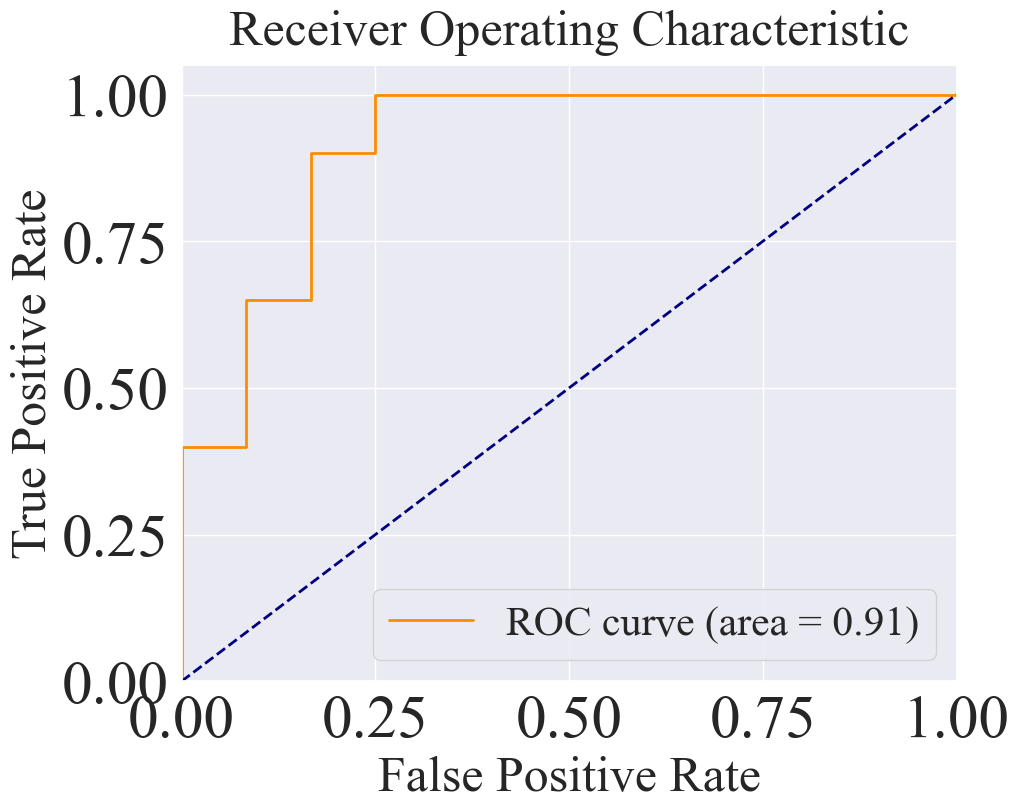

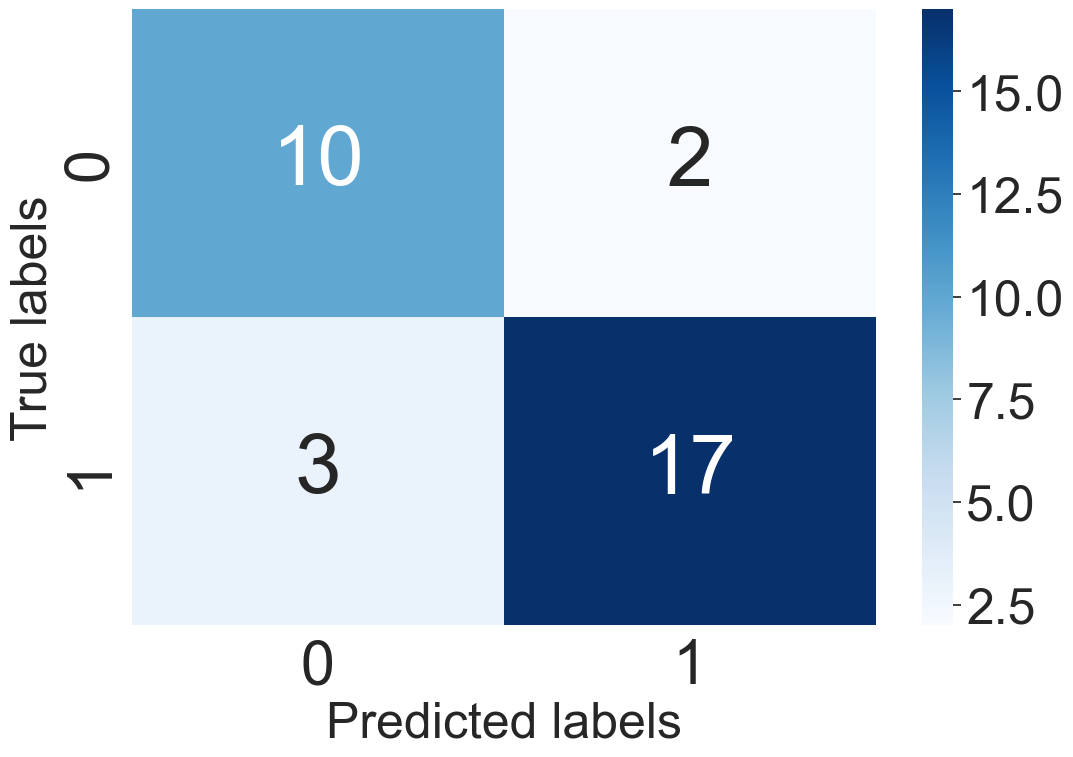

AUC Score: 0.9125
Sensitivity: 0.85
Accuracy: 0.84375
Confusion Matrix:
[[10  2]
 [ 3 17]]
Specificity: 0.8333333333333334
Precision: 0.8947368421052632


C:\Users\xiao\AppData\Local\Temp\ipykernel_35748\3359750243.py:89: RuntimeWarning: divide by zero encountered in scalar divide
  return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))
C:\Users\xiao\AppData\Local\Temp\ipykernel_35748\3359750243.py:89: RuntimeWarning: invalid value encountered in scalar multiply
  return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))


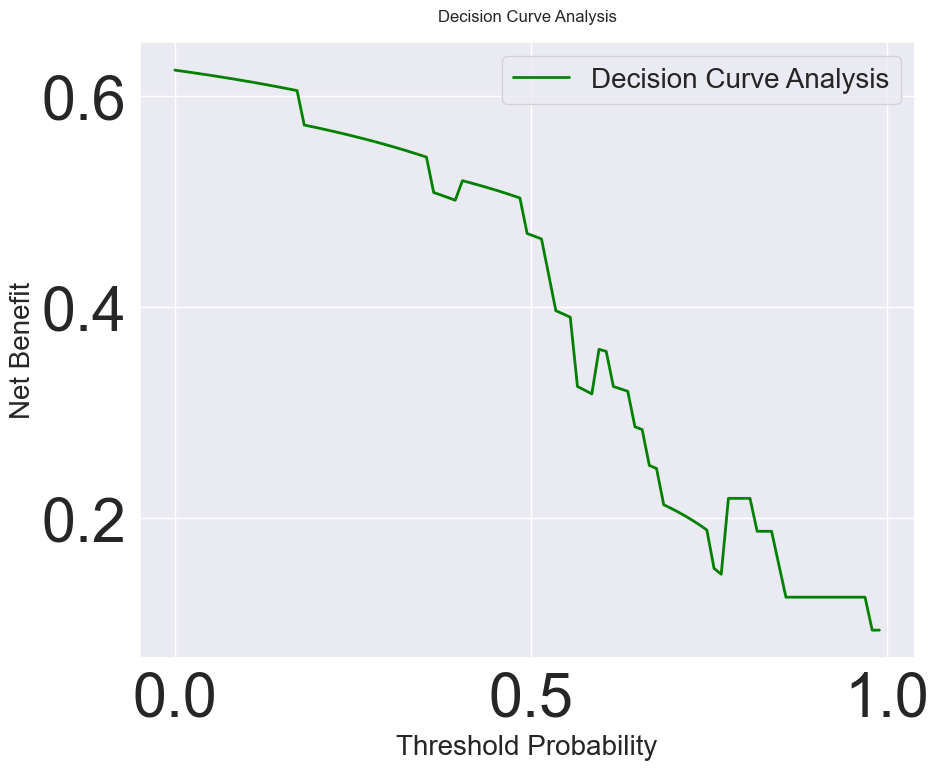

In [2]:
#LR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_train.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_test.csv')
# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 3. 初始化并训练逻辑回归模型
model = LogisticRegression(penalty="l2",solver="liblinear",C=1.0,max_iter=100)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('LASSO feature-Logistic regression', fontsize=36, y=1.02)  # 调整标题位置
plt.show()

# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print("Specificity:", specificity)
print("Precision:", precision)

import numpy as np

def calculate_net_benefit(tp, fp, threshold, num_cases):
    """
    Calculate the net benefit for a given threshold.

    Args:
    tp (int): True positives.
    fp (int): False positives.
    threshold (float): Threshold probability.
    num_cases (int): Total number of cases.

    Returns:
    float: Net benefit.
    """
    return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))

def decision_curve_analysis(y_true, y_pred_proba, thresholds):
    """
    Perform decision curve analysis.

    Args:
    y_true (array-like): True labels.
    y_pred_proba (array-like): Predicted probabilities.
    thresholds (array-like): Range of threshold probabilities.

    Returns:
    array-like: Net benefits for each threshold.
    """
    num_cases = len(y_true)
    net_benefits = []
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        net_benefit = calculate_net_benefit(tp, fp, threshold, num_cases)
        net_benefits.append(net_benefit)
    return net_benefits

# Usage
thresholds = np.linspace(0, 1, 100)  # Define a range of threshold probabilities
dca_values = decision_curve_analysis(y_test, y_pred_proba, thresholds)

# Plot Decision Curve Analysis
plt.figure(figsize=(10, 8))
plt.plot(thresholds, dca_values, color='green', lw=2, label='Decision Curve Analysis')
plt.xlabel('Threshold Probability', fontsize=20)
plt.ylabel('Net Benefit', fontsize=20)
plt.title('Decision Curve Analysis', fontsize=12, y=1.02)
plt.legend(loc="upper right", fontsize=20)
plt.grid(True)
plt.show()



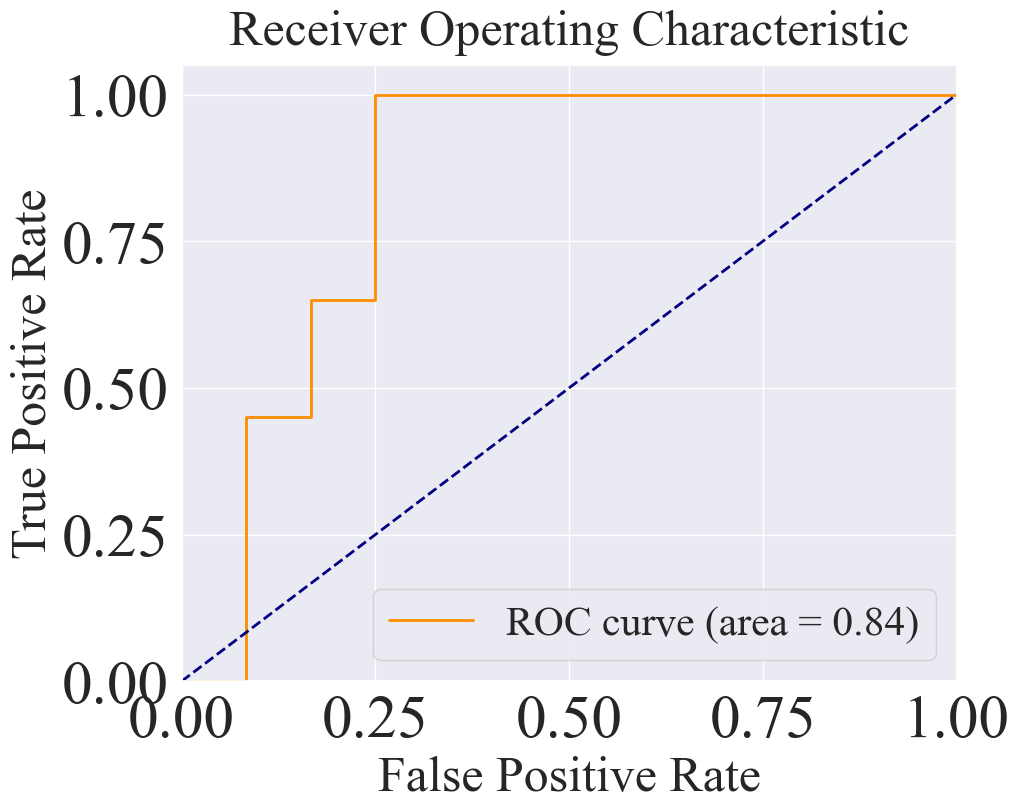

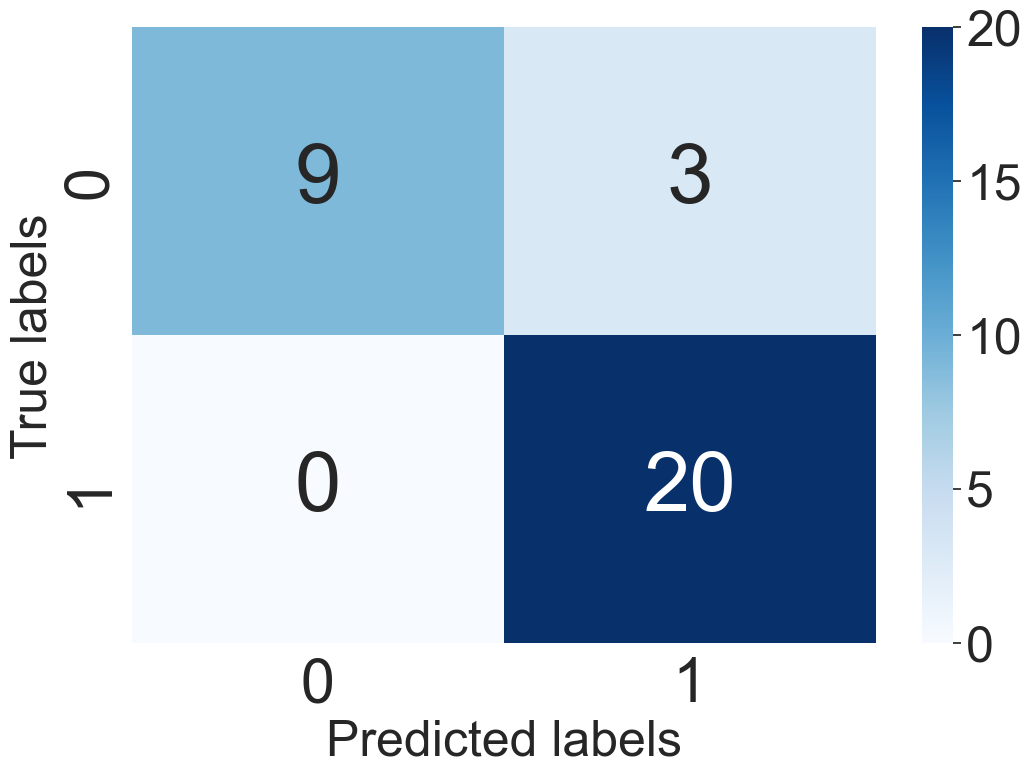

AUC Score: 0.8416666666666667
Sensitivity: 1.0
Accuracy: 0.90625
Confusion Matrix:
[[ 9  3]
 [ 0 20]]
Specificity: 0.75
Precision: 0.8695652173913043


C:\Users\xiao\AppData\Local\Temp\ipykernel_35748\3058723118.py:95: RuntimeWarning: divide by zero encountered in scalar divide
  return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))
C:\Users\xiao\AppData\Local\Temp\ipykernel_35748\3058723118.py:95: RuntimeWarning: invalid value encountered in scalar multiply
  return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))


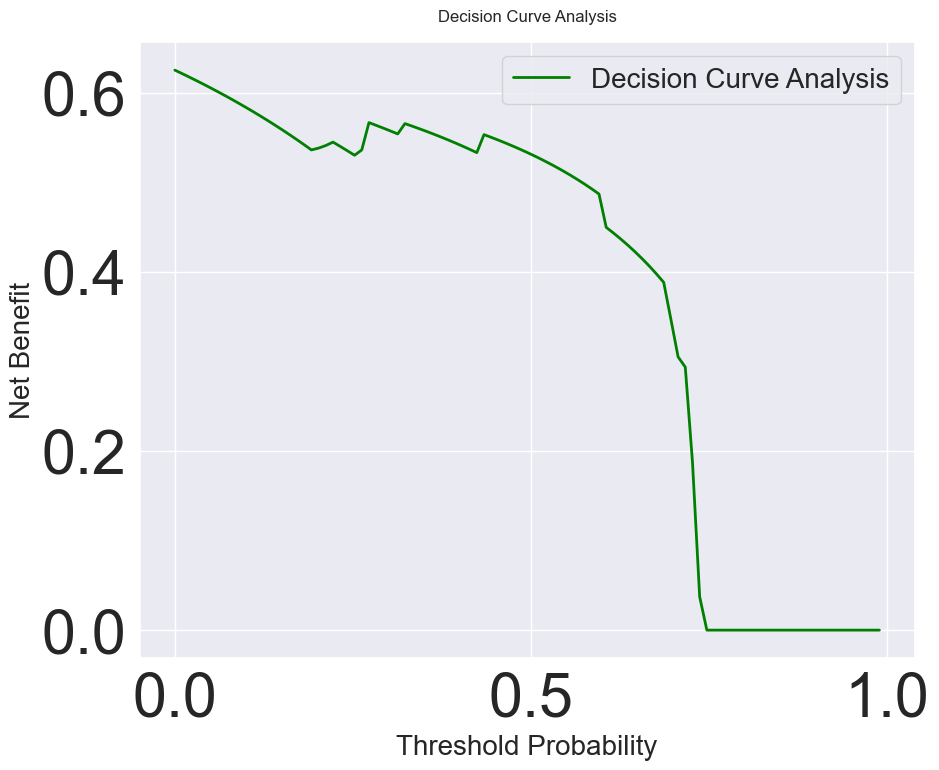

In [3]:
#svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'

# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_train.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_test.csv')
# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']
# 3. 初始化并训练支持向量机模型
# model = SVC(probability=True)
model = SVC(kernel='rbf', C=1.0,probability=True)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('LASSO feature-Support vector machine', fontsize=36, y=1.02)  # 调整标题位置
plt.show()


# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


print("Specificity:", specificity)
print("Precision:", precision)


import numpy as np

def calculate_net_benefit(tp, fp, threshold, num_cases):
    """
    Calculate the net benefit for a given threshold.

    Args:
    tp (int): True positives.
    fp (int): False positives.
    threshold (float): Threshold probability.
    num_cases (int): Total number of cases.

    Returns:
    float: Net benefit.
    """
    return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))

def decision_curve_analysis(y_true, y_pred_proba, thresholds):
    """
    Perform decision curve analysis.

    Args:
    y_true (array-like): True labels.
    y_pred_proba (array-like): Predicted probabilities.
    thresholds (array-like): Range of threshold probabilities.

    Returns:
    array-like: Net benefits for each threshold.
    """
    num_cases = len(y_true)
    net_benefits = []
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        net_benefit = calculate_net_benefit(tp, fp, threshold, num_cases)
        net_benefits.append(net_benefit)
    return net_benefits

# Usage
thresholds = np.linspace(0, 1, 100)  # Define a range of threshold probabilities
dca_values = decision_curve_analysis(y_test, y_pred_proba, thresholds)

# Plot Decision Curve Analysis
plt.figure(figsize=(10, 8))
plt.plot(thresholds, dca_values, color='green', lw=2, label='Decision Curve Analysis')
plt.xlabel('Threshold Probability', fontsize=20)
plt.ylabel('Net Benefit', fontsize=20)
plt.title('Decision Curve Analysis', fontsize=12, y=1.02)
plt.legend(loc="upper right", fontsize=20)
plt.grid(True)
plt.show()



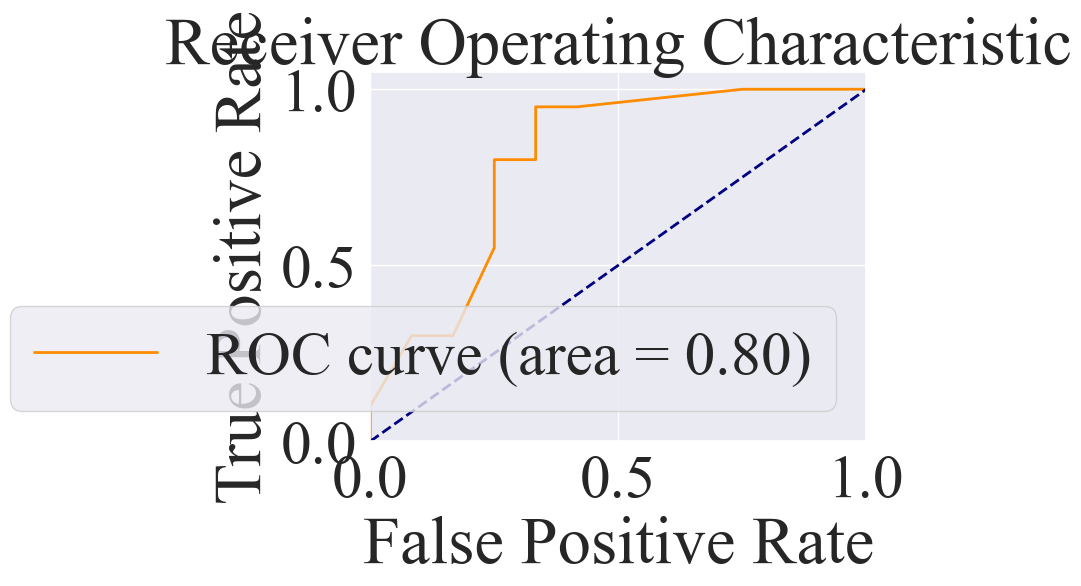

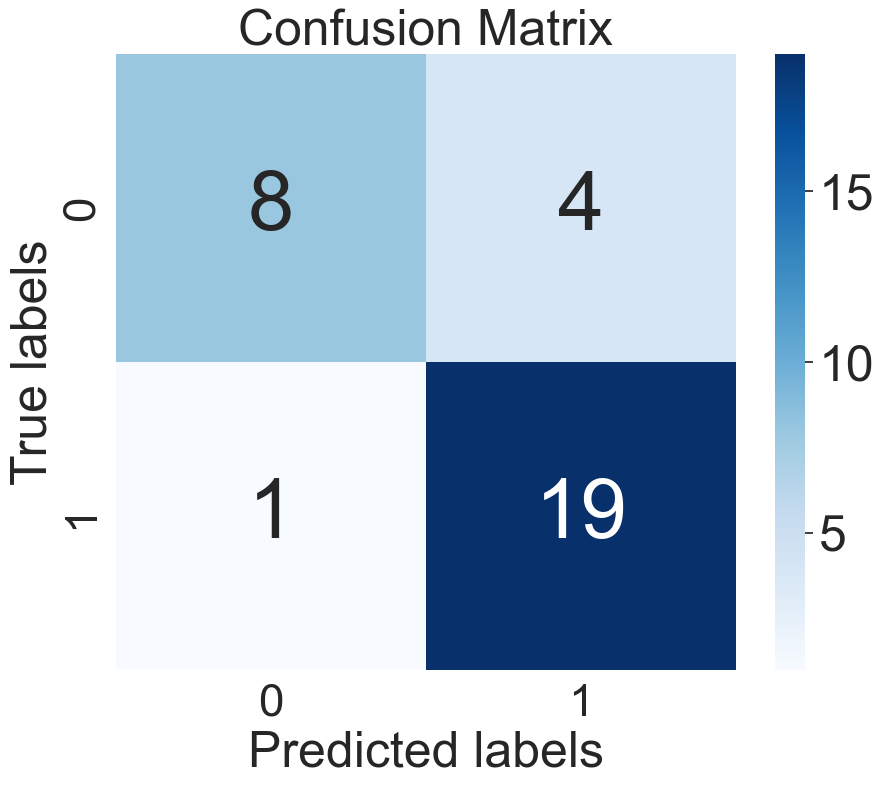

AUC Score: 0.7979166666666666
Sensitivity: 0.95
Accuracy: 0.84375
Confusion Matrix:
[[ 8  4]
 [ 1 19]]
Specificity: 0.6666666666666666
Precision: 0.8260869565217391


In [21]:
#mlp
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_train.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_test.csv')

# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 3. 初始化并训练MLP模型
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh',max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# 4. 使用测试集评估模型
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

y_pred = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# # 6. 绘制混淆矩阵
# plt.figure(figsize=(10, 8))  # 调整图形大小
# sns.set(font_scale=2)  # 设置字体比例以调整字体大小
# heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 36})  # 创建热图对象
# cbar = heatmap.collections[0].colorbar  # 获取颜色栏对象
# cbar.ax.tick_params(labelsize=36)  # 调整颜色栏标签字号大小
# plt.xlabel('Predicted labels', fontsize=36)  # 设置 x 轴标签字体大小
# plt.ylabel('True labels', fontsize=36)  # 设置 y 轴标签字体大小
# plt.title('LASSO feature-Logistic regression', fontsize=36)  # 设置标题字体大小
# plt.show()


# plt.figure(figsize=(10, 8))  # 调整图形大小
# sns.set(font_scale=2)  # 设置字体比例以调整字体大小
# heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 36})  # 创建热图对象
# cbar = heatmap.collections[0].colorbar  # 获取颜色栏对象
# cbar.ax.tick_params(labelsize=36)  # 调整颜色栏标签字号大小
# plt.xlabel('Predicted labels', fontsize=36)  # 设置 x 轴标签字体大小
# plt.ylabel('True labels', fontsize=36)  # 设置 y 轴标签字体大小
# plt.title('LASSO feature-Logistic regression', fontsize=36)  # 设置标题字体大小
# plt.show()  # 将混淆矩阵的0,1标签的字号更改为36

plt.figure(figsize=(10, 8))
sns.set(font_scale=3)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
plt.title('Confusion Matrix', fontsize=36)
plt.show()


# sns.set(context='talk', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2)
# plt.figure(figsize=(10, 8))
# ax = sns.heatmap(conf_matrix,annot=True, fmt='g', cmap='Blues', xticklabels='Predicted labels', yticklabels='True labels',
#                   annot_kws={"size": 36})  # Adjust annot_kws "size" as needed for annotation text

#     # Set the tick labels font size
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=36)  # Adjust fontsize as needed for xticklabels
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=36)  # Adjust fontsize as needed for yticklabels
# plt.show()


# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('LASSO feature-Multilayer perceptrons')
# plt.show()

# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)

# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Specificity:", specificity)
print("Precision:", precision)


In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'

def load_test_data(test_folder, batch_size=16):
    """
    Load test data from a specified folder.
    """
    test_datagen = ImageDataGenerator(rescale=1. / 255)
    test_generator = test_datagen.flow_from_directory(
        test_folder,
        target_size=(224, 224),
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

    return test_generator


def plot_confusion_matrix(cm, class_labels):
    """
    Plot a beautiful confusion matrix with larger fonts for the annotations and labels.
    """
    sns.set(context='talk', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2)
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels,
                     annot_kws={"size": 36})  # Adjust annot_kws "size" as needed for annotation text

    # Set the tick labels font size
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=36)  # Adjust fontsize as needed for xticklabels
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=36)  # Adjust fontsize as needed for yticklabels

    plt.show()

def evaluate_model(model_path, test_folder):
    """
    Load a model and evaluate it on the test set.
    """
    # Load the model
    model = load_model(model_path)

    # Load test data
    test_generator = load_test_data(test_folder)

    # Get the number of samples and number of classes
    num_samples = test_generator.samples
    num_classes = test_generator.num_classes

    # Predict the whole test set
    test_generator.reset()
    predictions = model.predict(test_generator, steps=np.ceil(num_samples / test_generator.batch_size), verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Ensure the number of class labels matches the number of classes predicted by the model
    if len(class_labels) != num_classes:
        raise ValueError(f"Number of class labels ({len(class_labels)}) does not match number of classes predicted by the model ({num_classes}).")

    # Identify misclassified images
    misclassified_indices = np.where(predicted_classes != true_classes)[0]
    filenames = test_generator.filenames
    misclassified_filenames = [filenames[i] for i in misclassified_indices]

    # Group misclassified images by their true class
    misclassified_by_class = {}
    for i in misclassified_indices:
        true_class = class_labels[true_classes[i]]
        if true_class not in misclassified_by_class:
            misclassified_by_class[true_class] = []
        misclassified_by_class[true_class].append(filenames[i])

    # Compute confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    print('Confusion Matrix:')
    print(cm)

    # Plot confusion matrix
    plot_confusion_matrix(cm, class_labels)

    # Compute classification report
    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    print('Classification Report:')
    print(report)

    # Output misclassified images for each class
    print("\nMisclassified Images by Class:")
    for class_label, misclassified_files in misclassified_by_class.items():
        print(f"\nClass '{class_label}':")
        for file in misclassified_files:
            print(file)

# 使用测试集路径调用 evaluate_model 函数
test_folder = "C:\\Users\DELL\Desktop\code\dataset\\archive (5)\Testing"# Replace with your test folder path
model_path ="C:\\Users\DELL\Desktop\XAI code\\0.7 10 T student_model Densenet121.h5"
evaluate_model(model_path, test_folder)
